# <font style="color:black">Color models and color conversions</font>
This lab covers the following:

* Color models and color conversions using OpenCV library 
* Tone reproduction 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread("../images/New_Zealand_Lake.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Merge the individual channels into a BGR image
#imgMerged = cv2.merge((b,g,r))
# Show the merged output
#plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

imgMerged = cv2.merge((r,g,b))
plt.subplot(144);plt.imshow(imgMerged);plt.title("Merged Output");


Convert RGB Image to HSV Image

For HSV, a color is described by following three main components:  
Hue is described by the dominant wavelength (i.e. “yellow”)  
Saturation defines the brilliance and intensity of a color. When white and black (grey) are added to the color, this reduces the color’s saturation.  
Value refers to the lightness or darkness of a color. It indicates the quantity of light reflected. 

In [2]:
hsv_im = cv2.cvtColor(imgMerged, cv2.COLOR_RGB2HSV)

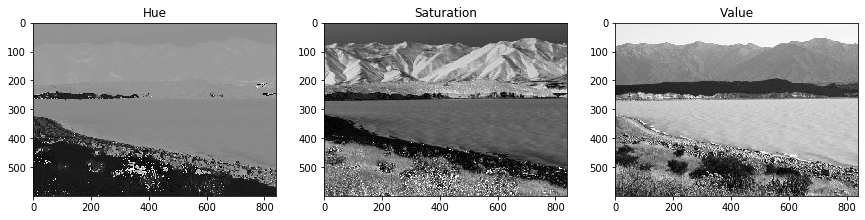

In [3]:
h,s,v = cv2.split(hsv_im)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("Hue");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("Saturation");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("Value");

The ranges that OpenCV manage for HSV format are the following:  

Hue (H): 0 to 179 (OpenCV scales it down from the traditional 0-360° range).  
Saturation (S): 0 to 255 (represents the purity of color, with 255 being full saturation).  
Value (V): 0 to 255 (represents brightness, with 0 being black and 255 being full brightness).

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load an example image
image = cv2.imread('../images/New_Zealand_Lake.jpg')  # Replace with your image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Function to update the hue, saturation, and value shift
# The np.clip() function in NumPy library is to limit the range of values to a specific minimum and maximum. 
def update_hsv(hue_shift, sat_shift, val_shift):
    modified_hsv = hsv_image.copy()
    modified_hsv[:, :, 0] = (modified_hsv[:, :, 0] + hue_shift) % 180
    modified_hsv[:, :, 1] = np.clip(modified_hsv[:, :, 1] + sat_shift, 0, 255)
    modified_hsv[:, :, 2] = np.clip(modified_hsv[:, :, 2] + val_shift, 0, 255)
    modified_hsv_rgb = cv2.cvtColor(modified_hsv, cv2.COLOR_HSV2RGB)
    
    # Display images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Original RGB Image')
    ax[0].axis('off')
    
    ax[1].imshow(modified_hsv_rgb)
    ax[1].set_title(f'Hue: {hue_shift}, Sat: {sat_shift}, Val: {val_shift}')
    ax[1].axis('off')
    
    plt.show()

# Create interactive sliders
widgets.interactive(update_hsv, 
                    hue_shift=widgets.IntSlider(min=-180, max=180, step=1, value=0, description='Hue'),
                    sat_shift=widgets.IntSlider(min=-100, max=100, step=1, value=0, description='Saturation'),
                    val_shift=widgets.IntSlider(min=-100, max=100, step=1, value=0, description='Value'))


interactive(children=(IntSlider(value=0, description='Hue', max=180, min=-180), IntSlider(value=0, description…

Difference color models were created for different reasons.  For example, 
The HSV (Hue, Saturation, Value) and LAB (Lightness, a*, b*) color models treat brightness differently:

1. **HSV (Value - V):** Represents the intensity of light in a pixel. Increasing V makes colors appear brighter,  
     but it does not affect the contrast significantly.
2. **LAB (Lightness - L):** Represents the perceived brightness in a way that mimics human vision.  
     Increasing L affects contrast and is more perceptually uniform compared to V.

#### How to Use:
- Adjusting the **Value (V) in HSV** enhances brightness without significantly altering contrast.
- Adjusting **Lightness (L) in LAB** affects brightness in a way that matches human perception more accurately.
- The LAB model is often used in **color correction and colorimetric analysis** , tasks where accurate color representation under varying lighting conditions is crucial, while HSV is commonly used for **image segmentation and object detection**.
"""


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load an example image
image = cv2.imread('../images/New_Zealand_Lake.jpg')  # Replace with your image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV and LAB
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

# Function to update the value (V in HSV) and lightness (L in LAB)
def update_v_l(val_shift, l_shift):
    modified_hsv = hsv_image.copy()
    modified_lab = lab_image.copy()
    
    # Adjust V in HSV
    modified_hsv[:, :, 2] = np.clip(modified_hsv[:, :, 2] + val_shift, 0, 255)
    modified_hsv_rgb = cv2.cvtColor(modified_hsv, cv2.COLOR_HSV2RGB)
    
    # Adjust L in LAB
    modified_lab[:, :, 0] = np.clip(modified_lab[:, :, 0] + l_shift, 0, 255)
    modified_lab_rgb = cv2.cvtColor(modified_lab, cv2.COLOR_LAB2RGB)
    
    # Display images
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image)
    ax[0].set_title('Original RGB Image')
    ax[0].axis('off')
    
    ax[1].imshow(modified_hsv_rgb)
    ax[1].set_title(f'HSV Adjusted V: {val_shift}')
    ax[1].axis('off')
    
    ax[2].imshow(modified_lab_rgb)
    ax[2].set_title(f'LAB Adjusted L: {l_shift}')
    ax[2].axis('off')
    
    plt.show()

# Create interactive sliders
widgets.interactive(update_v_l, 
                    val_shift=widgets.IntSlider(min=-100, max=100, step=1, value=0, description='Value (HSV)'),
                    l_shift=widgets.IntSlider(min=-100, max=100, step=1, value=0, description='Lightness (LAB)'))


interactive(children=(IntSlider(value=0, description='Value (HSV)', min=-100), IntSlider(value=0, description=…

Here’s your revised text with improved clarity and fluency:

Color models that separate chromatic from achromatic information allow you to adjust brightness and contrast, making dark areas more visible and bright areas less overexposed, without altering the actual colors.
This adjustment is performed on the luminance channel of the image.

Now, let's apply tone reproduction using the LAB color model. 

In [6]:
# Function for automatic tone correction using LAB color space
def color_correction(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to Lightness channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    
    # Merge and convert back to RGB
    corrected_lab = cv2.merge([l, a, b])
    corrected_rgb = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2RGB)
    
    # Display images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    ax[1].imshow(corrected_rgb)
    ax[1].set_title('Corrected Image')
    ax[1].axis('off')
    
    plt.show()

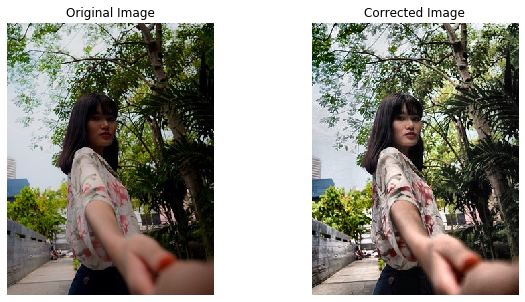

In [7]:
# Load an example image
#image = cv2.imread('../images/New_Zealand_Lake.jpg')  # Replace with your image
image = cv2.imread('lab6/face.jpg')  # Replace with your image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

color_correction(image)

In [23]:
## Image from https://photofleem.com/2018/lightroom-fix-tone/